Создаем равномерное, нормальное (Гауссовское), Пуассоновское, экспоненциальное распределение и распределение коши:

In [10]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

distr_size = 200
distributions = {
    "uniform": np.random.uniform(low=5, high=7, size=distr_size),
    "gauss": np.random.normal(size=distr_size),
    "poisson": np.random.poisson(lam=9, size=distr_size),
    "exponential": np.random.exponential(scale=1 / 3, size=distr_size),
    "caushy": st.cauchy.rvs(loc=0, scale=2, size=distr_size)
}

Отобразим нормальное распределение на отрезок от 17 до 22:

In [11]:
gauss = distributions["gauss"]
for i in range(len(gauss)):
    gauss[i] = 17 + 22 ** 0.5 * gauss[i]

Построим гистограммы распределений

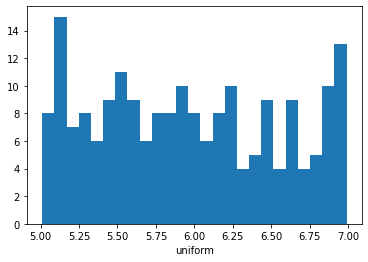

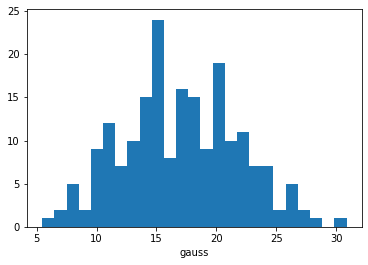

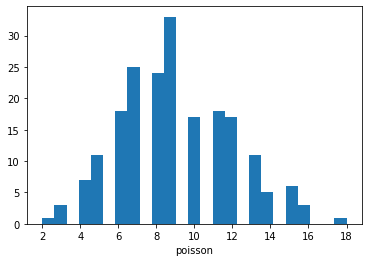

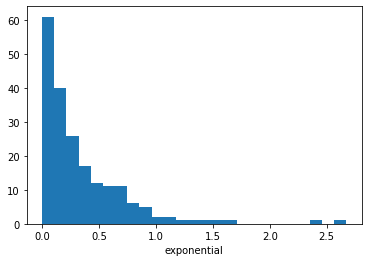

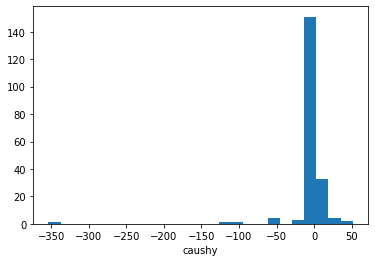

In [17]:
for distr_key in distributions:
  plt.hist(distributions[distr_key], bins=25)
  plt.xlabel(distr_key)
  plt.show()

Теперь для всех распределений посчитаем выборочное среднее:

In [18]:
means = {}
for distr in distributions:
    means[distr] = sum(distributions[distr]) / distr_size
print("Sample means : ", means)

Sample means :  {'uniform': 5.960200175707413, 'gauss': 17.05268717757926, 'poisson': 9.035, 'exponential': 0.33909975112566043, 'caushy': -2.9179754636091024}


Посчитаем выборочные медианы и квартили 1/4 и 3/4:

In [19]:
medians = {}
quartile_1_4 = {}
quartile_3_4 = {}
for distr in distributions:
    vals = distributions[distr]
    vals.sort()
    quartile_1_4[distr] = (vals[distr_size // 4 - 1] + vals[distr_size // 4]) / 2
    medians[distr] = (vals[distr_size // 2 - 1] + vals[distr_size // 2]) / 2
    quartile_3_4[distr] = (vals[3 * distr_size // 4 - 1] + vals[3 * distr_size // 4]) / 2
    
print("Sample quartile 1/4: ", quartile_1_4)
print("Sample medians: ", medians)
print("Sample means 3/4: ", quartile_3_4)


Sample quartile 1/4:  {'uniform': 5.473250603409577, 'gauss': 13.734895521550246, 'poisson': 7.0, 'exponential': 0.08297922553757517, 'caushy': -1.9373597201260244}
Sample medians:  {'uniform': 5.928605104903342, 'gauss': 17.084945347769498, 'poisson': 9.0, 'exponential': 0.20708670434631302, 'caushy': 0.3134866266916777}
Sample means 3/4:  {'uniform': 6.485231311072514, 'gauss': 20.34229693904308, 'poisson': 11.0, 'exponential': 0.4565011494521513, 'caushy': 2.1937153272004304}


Посчитаем дисперсию:

In [5]:
variance = {}
for distr in distributions:
    variance[distr] = sum((distributions[distr] - means[distr]) ** 2) / distr_size
print("Sample variance: ", variance)

Sample variance:  {'uniform': 0.3403130404313511, 'gauss': 21.95002153597517, 'poisson': 9.31560000000002, 'exponential': 0.09136602585169121, 'caushy': 3872.64063259632}


Посчитаем исправленную дисперсию:

In [6]:
corr_variance = {}
correction = distr_size / (distr_size - 1)
for distr in distributions:
    corr_variance[distr] = correction * variance[distr]
print("Corrected sample variance: ", corr_variance)

Corrected sample variance:  {'uniform': 0.34202315621241314, 'gauss': 22.06032315173384, 'poisson': 9.362412060301526, 'exponential': 0.0918251516097399, 'caushy': 3892.101138287758}


Посчитаем коэффициенты ассиметрии (коэффициент ассиметрии говорит о том, где площадь под графиком плотности, относительно среднего, больше):

In [7]:
assymetry = {}
for distr in distributions:
    moment_3 = sum((distributions[distr] - means[distr]) ** 3) / distr_size
    assymetry[distr] = moment_3 / (variance[distr] ** (3 / 2))
print("Assymetry factor: ", assymetry)

Assymetry factor:  {'uniform': 0.01456460890733195, 'gauss': -0.1229266944469929, 'poisson': 0.562219284712117, 'exponential': 1.4961792586817344, 'caushy': 12.112365194341955}


Посчитаем коэффициент эксцесса (коэффициент эксцесса показывает на сколько отличается от стандартного распределения Гаусса):

In [8]:
kurt = {}
for distr in distributions:
    moment_4 = sum((distributions[distr] - means[distr]) ** 4) / distr_size
    kurt[distr] = moment_4 / (variance[distr] ** 2) - 3
print("Kurtosis: ", kurt)

Kurtosis:  {'uniform': -1.2993477923583392, 'gauss': -0.16277569888569587, 'poisson': 0.5779724211689672, 'exponential': 1.8261182884177147, 'caushy': 157.61909261626454}


Посчитаем коэффициент вариации:

In [9]:
variation = {}
for distr in distributions:
    variation[distr] = (variance[distr] ** (1 / 2)) / abs(means[distr])
print("Variation factor: ", variation)

Variation factor:  {'uniform': 0.09707609868672072, 'gauss': 0.2804444812183577, 'poisson': 0.34371022358795233, 'exponential': 1.0271560308233163, 'caushy': 12.455747486362347}
